In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import kagglehub
import os
from matplotlib import pyplot as plt
from pandas import DataFrame

PATH_TO_DATASET = os.path.join(kagglehub.dataset_download("salvatorerastelli/spotify-and-youtube"), "Spotify_Youtube.csv")
DATA_PATH = os.path.join(os.getcwd(), "data")
PLOT_PATH = os.path.join(DATA_PATH, "plots")
CSV_PATH = os.path.join(DATA_PATH, "csv")

# Loading the dataset
#### Initial dataset parsing
Goal is to remove unwanted columns such as song URL as well as dividing columns into numeric and categorical.


In [11]:
df = pd.read_csv(PATH_TO_DATASET)
NUMERIC_COLUMNS = ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Views', 'Likes', 'Comments', 'Stream']
CATEGORICAL_COLUMNS = ['Artist', 'Track', 'Album', 'Album_type', 'Title', 'Channel', 'Licensed', 'official_video']
df.drop(columns=['Description', 'Url_youtube', 'Url_spotify', 'Uri'],axis=1, inplace=True)
df.head()


,Unnamed: 0,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,...,Tempo,Duration_ms,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream
0,0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,...,138.559,222640.0,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09
1,1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,...,92.761,200173.0,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,True,True,3.100837e+08
2,2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,...,108.014,215150.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,True,True,6.306347e+07
3,3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.0,-5.810,0.0260,...,120.423,233867.0,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,True,True,4.346636e+08
4,4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,...,167.953,340920.0,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,True,True,6.172597e+08


# Reading basic data

#### Numerical values

In [46]:

numeric_missing_value = df[NUMERIC_COLUMNS].isna().sum()
print(f"Count of missing numeric values:\n{numeric_missing_value}\n")
df.dropna(subset=NUMERIC_COLUMNS, inplace=True)
numeric_summary = df[NUMERIC_COLUMNS].describe(percentiles=[0.05, 0.5, 0.95])
display(numeric_summary)

Count of missing numeric values:
 Danceability        0
Energy              0
Key                 0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_ms         0
Views               0
Likes               0
Comments            0
Stream              0
dtype: int64



,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,1.954900e+04,1.954900e+04,1.954900e+04,1.954900e+04,1.954900e+04
mean,0.621059,0.635170,5.294337,-7.633179,0.095392,0.289106,0.055292,0.191226,0.528950,120.605702,2.246281e+05,9.545626e+07,6.700487e+05,2.786371e+04,1.371101e+08
std,0.165489,0.213555,3.579338,4.618839,0.106243,0.285908,0.192519,0.165197,0.245228,29.619340,1.269126e+05,2.775744e+08,1.805054e+06,1.959074e+05,2.463589e+08
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,2.600000e+01,0.000000e+00,0.000000e+00,6.574000e+03
5%,0.319000,0.220000,0.000000,-15.674200,0.027800,0.001614,0.000000,0.058400,0.119000,78.435600,1.342670e+05,5.476040e+04,8.340000e+02,1.100000e+01,2.651398e+06
50%,0.639000,0.666000,5.000000,-6.516000,0.050700,0.190000,0.000002,0.125000,0.536000,119.964000,2.132530e+05,1.491440e+07,1.279090e+05,3.343000e+03,4.979139e+07
95%,0.862000,0.929000,11.000000,-3.195800,0.319600,0.885600,0.575400,0.551000,0.920000,174.799600,3.342132e+05,4.398550e+08,3.041081e+06,1.020016e+05,5.844489e+08
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


#### Categorical values


In [44]:
categorical_missing_value = df[CATEGORICAL_COLUMNS].isna().sum()
print(f"Count of missing categorical values:\n{categorical_missing_value}\n")
df.dropna(subset=CATEGORICAL_COLUMNS, inplace=True)
categorical_summary = df[CATEGORICAL_COLUMNS].describe()
display(categorical_summary)
#proportions for columns 'Album_type', 'Licensed' and 'official_video'
categorical_proportions = [
    df['Album_type'].value_counts(normalize=True),
    df['Licensed'].value_counts(normalize=True),
    df['official_video'].value_counts(normalize=True)
]
display(categorical_proportions)

Count of missing categorical values:
 Artist            0
Track             0
Album             0
Album_type        0
Title             0
Channel           0
Licensed          0
official_video    0
dtype: int64


,Artist,Track,Album,Album_type,Title,Channel,Licensed,official_video
count,19549,19549,19549,19549,19549,19549,19549,19549
unique,2040,16866,11381,3,17534,6482,2,2
top,SICK LEGEND,El Ultimo Adiós - Varios Artistas Version,Greatest Hits,album,Color Esperanza 2020 - Various Artists (Offici...,T-Series,True,True
freq,10,23,28,14148,18,237,13727,15260


[Album_type
 album          0.723720
 single         0.239859
 compilation    0.036421
 Name: proportion, dtype: float64,
 Licensed
 True     0.702184
 False    0.297816
 Name: proportion, dtype: float64,
 official_video
 True     0.780603
 False    0.219397
 Name: proportion, dtype: float64]

#### [Optional] Save the data to .csv files.

In [69]:
def save_to_csv(to_save, filename):
    full_filename = f'{filename}.csv'
    if not isinstance(to_save, list):
        to_save.to_csv(os.path.join(CSV_PATH, full_filename), index=True)
    else:
        to_save[0].to_csv(os.path.join(CSV_PATH, full_filename), index=True)
        for df_to_save in to_save[1:]:
            df_to_save.to_csv(os.path.join(CSV_PATH, full_filename), mode='a', index=True)
    print(f"Saved file {full_filename}")

save_to_csv(numeric_summary, "numeric_summary")
save_to_csv(numeric_missing_value, "numeric_missing_value")
save_to_csv(categorical_summary, "categorical_summary")
save_to_csv(categorical_missing_value, "categorical_missing_value")
save_to_csv(categorical_proportions, "categorical_proportions")
print(f"Data saved to {CSV_PATH}")

Save file numeric_summary.csv
Save file numeric_missing_value.csv
Save file categorical_summary.csv
Save file categorical_missing_value.csv
Save file categorical_proportions.csv
Data saved to C:\Users\Ignac\OneDrive\Pulpit\Studia\S4\MSID\SpotifySongs\data


In [ ]:
# Visualizing the data

In [72]:
def save_plot(plot, filename):
    full_filename = f'{filename}.png'
    plot.savefig(os.path.join(PLOT_PATH, full_filename), bbox_inches='tight')
    print(f"Saved plot {full_filename}")

## 1. Boxplots and violinplots

#### Relationship between song's performance (number of Views (YouTube) and Streams (Spotify)) and the presence of an official video for the song

- **Streams**

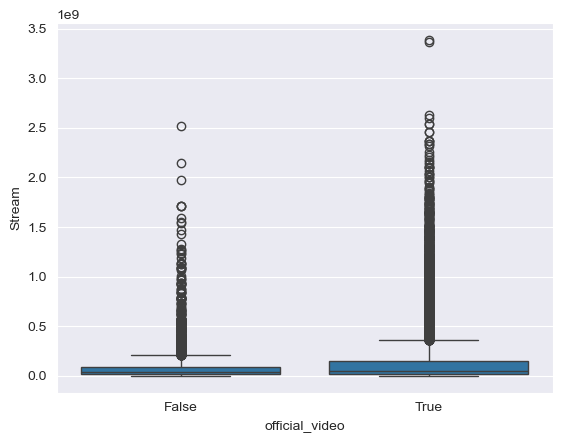

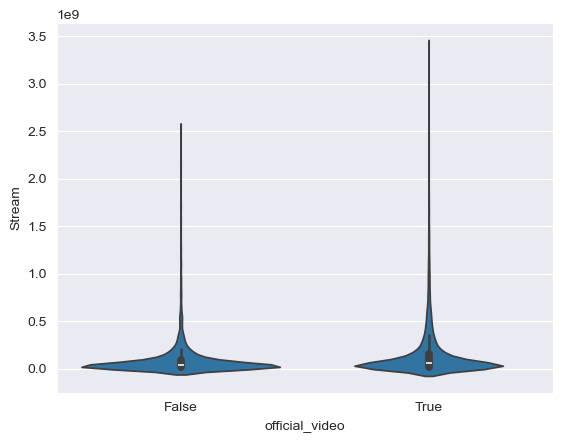

In [84]:
sns.boxplot(x="official_video", y="Stream", data=df)
plt.show()
plt.close()
sns.violinplot(x="official_video", y="Stream", data=df)
plt.show()
plt.close()

- **Views**

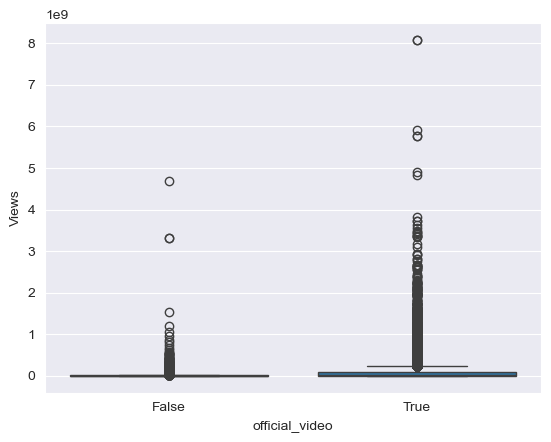

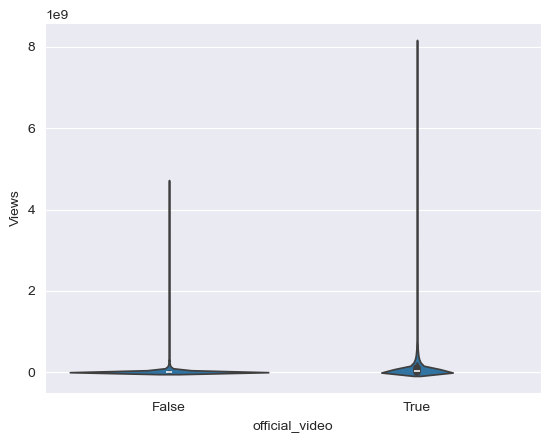

In [85]:
sns.boxplot(x="official_video", y="Views", data=df)
plt.show()
plt.close()
sns.violinplot(x="official_video", y="Views", data=df)
plt.show()
plt.close()

#### Relationship between the upload format of a song (as a single, album or part of a compilation) and the number of streams on Spotify

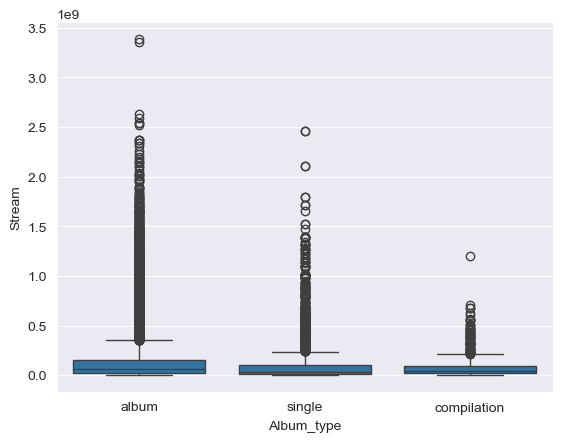

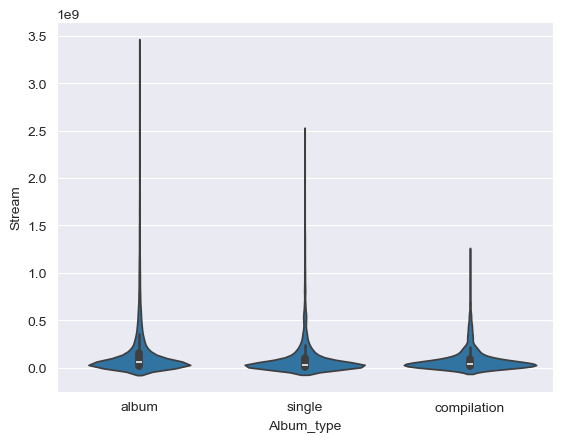

In [86]:
sns.boxplot(x="Album_type", y="Stream", data=df)
plt.show()
plt.close()
sns.violinplot(x="Album_type", y="Stream", data=df)
plt.show()
plt.close()

##### [Optional] Save boxplots and violinplots to a file

In [87]:
sns.boxplot(x="official_video", y="Stream", data=df)
save_plot(plt, "boxplot_official_video_to_stream")
plt.close()
sns.violinplot(x="official_video", y="Stream", data=df)
save_plot(plt, "violinplot_official_video_to_stream")
plt.close()
sns.boxplot(x="official_video", y="Views", data=df)
save_plot(plt, "boxplot_official_video_to_views")
plt.close()
sns.violinplot(x="official_video", y="Views", data=df)
save_plot(plt, "violinplot_official_video_to_views")
plt.close()
sns.boxplot(x="Album_type", y="Stream", data=df)
save_plot(plt, "boxplot_album_type_to_stream")
plt.close()
sns.violinplot(x="Album_type", y="Stream", data=df)
save_plot(plt, "violinplot_album_type_to_stream")
plt.close()

Saved plot boxplot_official_video_to_stream.png
Saved plot violinplot_official_video_to_stream.png
Saved plot boxplot_official_video_to_views.png
Saved plot violinplot_official_video_to_views.png
Saved plot boxplot_album_type_to_stream.png
Saved plot violinplot_album_type_to_stream.png
